In [ ]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# data collection

In [ ]:
df=pd.read_csv('healthcare-dataset-stroke-data (1).csv')

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
df=df.drop(['id'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
df['age'].sample(5)

,age
2997,71.0
3235,51.0
3013,45.0
538,16.0
3151,56.0


In [ ]:
df['age'] = df['age'].astype(int)


In [ ]:
df['age'].dtype

dtype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 439.3+ KB


In [ ]:
print(df.shape)
print(df.size)

(5110, 11)
56210


In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


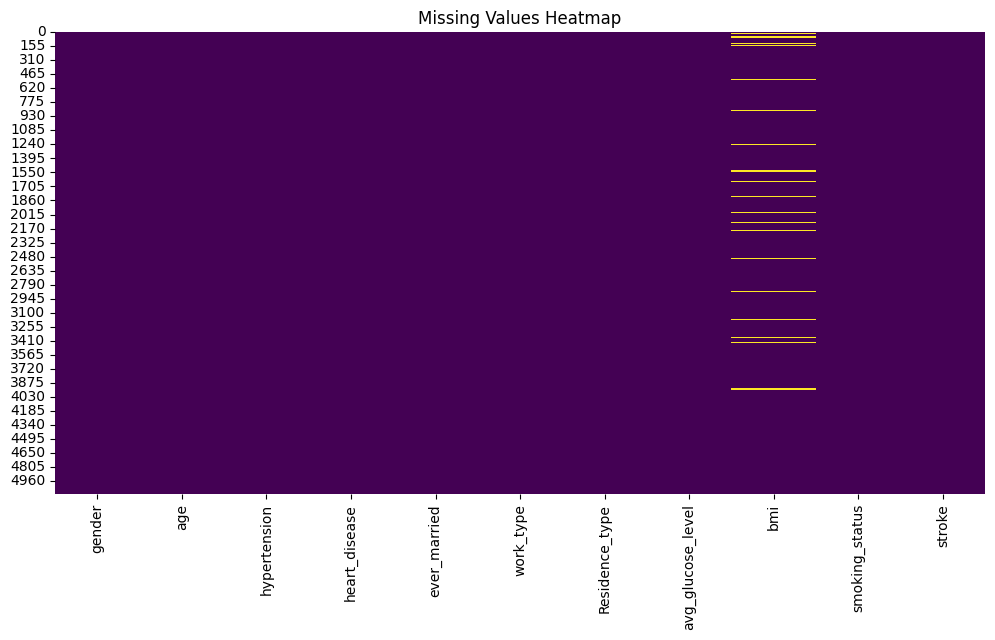

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   int64  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 439.3+ KB


# EDA

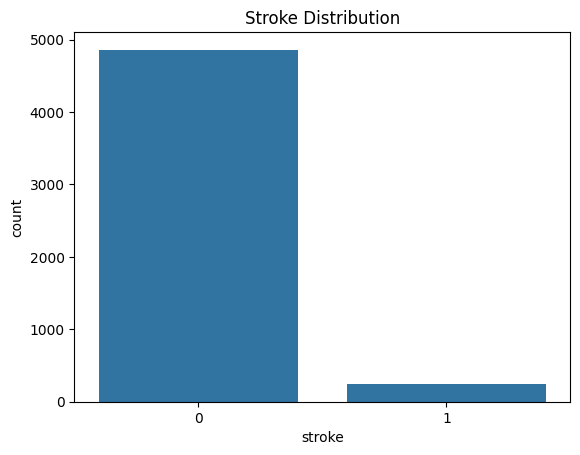

stroke
0    4861
1     249
Name: count, dtype: int64


In [ ]:
sns.countplot(x='stroke', data=df)
plt.title("Stroke Distribution")
plt.show()
print(df['stroke'].value_counts())


**data is imbalanced and we need to balanced it **

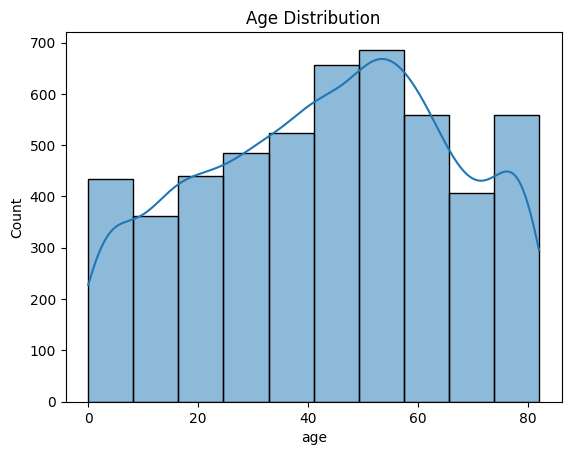

In [ ]:
sns.histplot(df['age'], bins=10,kde=True)
plt.title("Age Distribution")
plt.show()


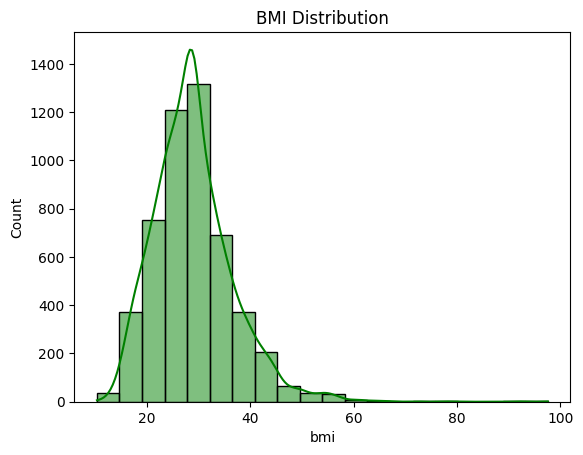

In [ ]:
sns.histplot(df['bmi'], bins=20, kde=True,color='green')
plt.title("BMI Distribution")
plt.show()


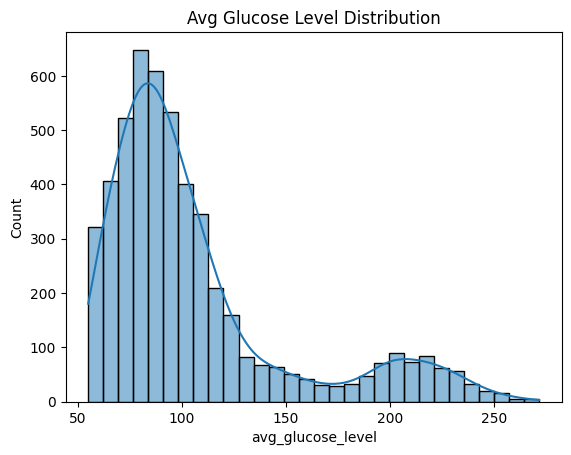

In [ ]:
sns.histplot(df['avg_glucose_level'], bins=30, kde=True)
plt.title("Avg Glucose Level Distribution")
plt.show()


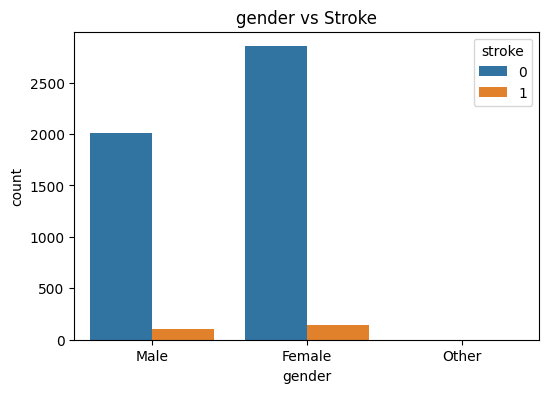

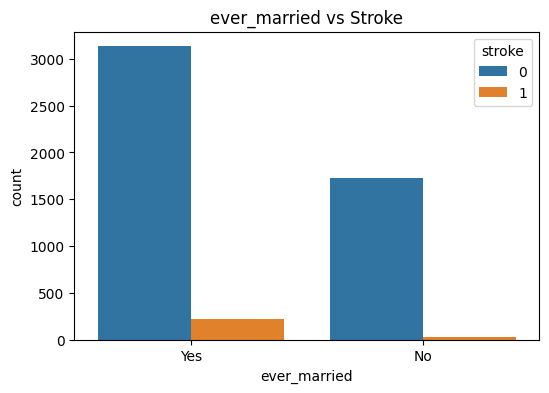

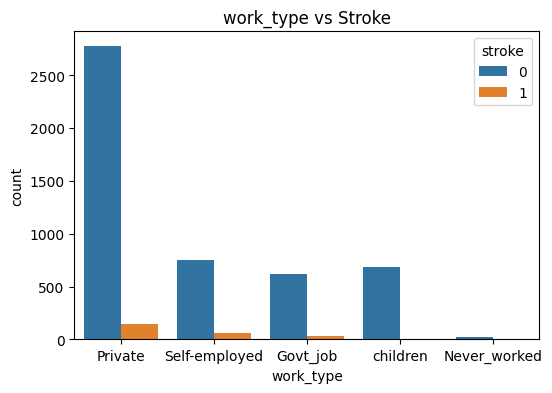

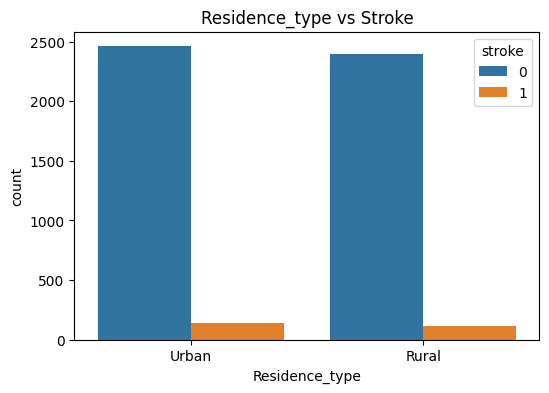

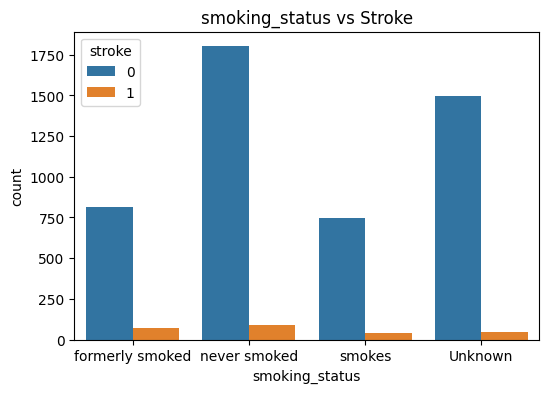

In [ ]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='stroke', data=df)
    plt.title(f"{col} vs Stroke")
    plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in categorical_cols:
    df[col]=le.fit_transform(df[col])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.600000,1,1
1,0,61,0,0,1,3,0,202.21,28.893237,2,1
2,1,80,0,1,1,2,0,105.92,32.500000,2,1
3,0,49,0,0,1,2,1,171.23,34.400000,3,1
4,0,79,1,0,1,3,0,174.12,24.000000,2,1


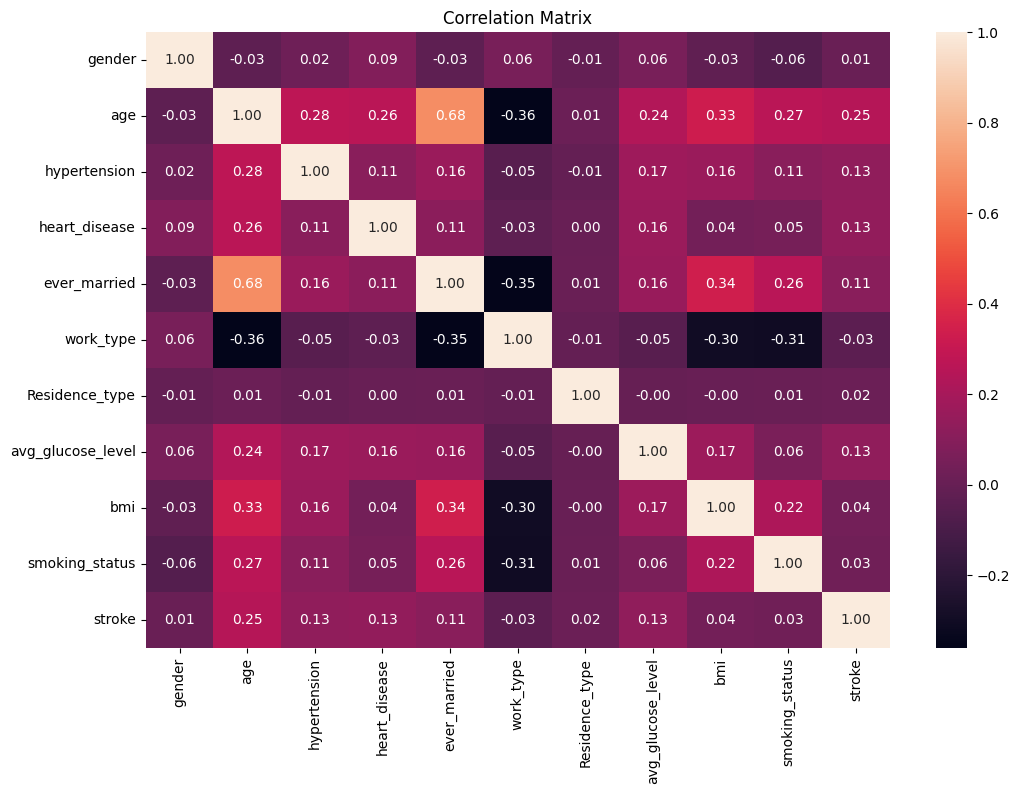

In [ ]:

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True,fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(x.shape)
print(y.shape)

(5110, 10)
(5110,)


In [ ]:
numeric_cols = ['age', 'bmi', 'avg_glucose_level']
scaler = StandardScaler()
x[numeric_cols] = scaler.fit_transform(x[numeric_cols])


In [143]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [144]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3832, 10)
(1278, 10)
(3832,)
(1278,)


In [145]:
smote=SMOTE(random_state=42)
x_train_res,y_train_res=smote.fit_resample(x_train,y_train)

In [146]:
print("Class distribution after SMOTE:")
print(pd.Series(y_train_res).value_counts())

Class distribution after SMOTE:
stroke
0    3663
1    3663
Name: count, dtype: int64


In [147]:
rf=RandomForestClassifier(n_estimators=400)


In [148]:
rf.fit(x_train_res,y_train_res)
y_pred_rf=rf.predict(x_test)

In [149]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_res, y_train_res)
y_pred_dt = dt.predict(x_test)


In [150]:
from sklearn.neighbors import KNeighborsClassifier


In [151]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_res, y_train_res)
y_pred_knn = knn.predict(x_test)


In [152]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---\n")

    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}\n")


In [153]:
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_knn, "KNN")


--- Random Forest ---

Confusion Matrix:
[[1105   93]
 [  59   21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1198
           1       0.18      0.26      0.22        80

    accuracy                           0.88      1278
   macro avg       0.57      0.59      0.58      1278
weighted avg       0.90      0.88      0.89      1278

Accuracy: 0.8811

--- Decision Tree ---

Confusion Matrix:
[[1067  131]
 [  56   24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1198
           1       0.15      0.30      0.20        80

    accuracy                           0.85      1278
   macro avg       0.55      0.60      0.56      1278
weighted avg       0.90      0.85      0.87      1278

Accuracy: 0.8537

--- KNN ---

Confusion Matrix:
[[996 202]
 [ 41  39]]

Classification Report:
              precision    recall  f1-score   su

In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(knn, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid.fit(x_train_res, y_train_res)

print("Best parameters:", grid.best_params_)


Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [155]:
best_knn = grid.best_estimator_
best_knn.fit(x_train_res, y_train_res)
y_pred_knn = best_knn.predict(x_test)


In [156]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---\n")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}\n")

evaluate_model(y_test, y_pred_knn, "KNN (Tuned)")


--- KNN (Tuned) ---

Confusion Matrix:
[[956 242]
 [ 33  47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.87      1198
           1       0.16      0.59      0.25        80

    accuracy                           0.78      1278
   macro avg       0.56      0.69      0.56      1278
weighted avg       0.92      0.78      0.84      1278

Accuracy: 0.7848



In [157]:
import joblib
joblib.dump(best_knn, "knn_model.pkl")

# Save the scaler too (important for KNN)
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']